In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Report Link


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("dataset ML.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


DataFrame contains a total of 43,400 records.
"bmi" and "smoking_status," have missing values (NaN).

3 columns with float64 data type.
4 columns with int64 data type.
5 columns with object data type (categorical variables).

In [6]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [7]:
df.shape

(43400, 12)

In [8]:
df.duplicated().sum()

0

### Data Cleaning

In [9]:
df_imput = df

In [10]:
from sklearn.impute import KNNImputer

# Create a K-NN imputer and specify the number of neighbors (k)
knn_imputer = KNNImputer(n_neighbors=5)

# Perform K-NN imputation
imputed_data = knn_imputer.fit_transform(df_imput[['avg_glucose_level','bmi']])


In [11]:
imputed_data

array([[ 95.12,  18.  ],
       [ 87.96,  39.2 ],
       [110.89,  17.6 ],
       ...,
       [ 91.94,  28.9 ],
       [ 99.16,  33.2 ],
       [ 79.48,  20.6 ]])

In [12]:
# Create a new column for the imputed 'bmi' values
df['bmi'] = imputed_data[:, 1]  # Use the second column from the imputed result

In [13]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Split data into complete and incomplete records
complete_data = df_imput.dropna(subset=['smoking_status'])
incomplete_data = df_imput[df_imput['smoking_status'].isnull()]

# Defining features for the model to predict
# Make sure to select appropriate features for your problem
features = ['age', 'avg_glucose_level', 'bmi']

# Train a model to predict missing values in Smokeing status
model = RandomForestClassifier()
model.fit(complete_data[features], complete_data['smoking_status'])
predicted_values = model.predict(incomplete_data[features])

# Replace missing values with predicted values
df_imput.loc[df_imput['smoking_status'].isnull(),'smoking_status'] = predicted_values

In [15]:
df_imput.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


In [16]:
df_imput.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400,43400.000000,43400.000000,43400.000000,43400,43400,43400,43400.000000,43400.000000,43400,43400.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,3,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,25665,NaN,NaN,NaN,27938,24834,21756,NaN,NaN,27010,NaN
mean,36326.142350,NaN,42.217894,0.093571,0.047512,NaN,NaN,NaN,104.482750,28.644355,NaN,0.018041
std,21072.134879,NaN,22.519649,0.291235,0.212733,NaN,NaN,NaN,43.111751,7.684815,NaN,0.133103
min,1.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.000000,10.100000,NaN,0.000000
25%,18038.500000,NaN,24.000000,0.000000,0.000000,NaN,NaN,NaN,77.540000,23.400000,NaN,0.000000
50%,36351.500000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.580000,27.800000,NaN,0.000000
75%,54514.250000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,112.070000,32.800000,NaN,0.000000


In [17]:
df_imput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                43400 non-null  float64
 10  smoking_status     43400 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


### Exploratory Data Analysis (EDA)

In [18]:
x = df_imput.drop('stroke',axis=1)
y = df_imput['stroke']

In [19]:
df_imput["stroke"].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [20]:
for i in x:
    print(f"Unique values in {i}")
    print(len(x[i].unique()))
    print("*_"*10)

Unique values in id
43400
*_*_*_*_*_*_*_*_*_*_
Unique values in gender
3
*_*_*_*_*_*_*_*_*_*_
Unique values in age
104
*_*_*_*_*_*_*_*_*_*_
Unique values in hypertension
2
*_*_*_*_*_*_*_*_*_*_
Unique values in heart_disease
2
*_*_*_*_*_*_*_*_*_*_
Unique values in ever_married
2
*_*_*_*_*_*_*_*_*_*_
Unique values in work_type
5
*_*_*_*_*_*_*_*_*_*_
Unique values in Residence_type
2
*_*_*_*_*_*_*_*_*_*_
Unique values in avg_glucose_level
12543
*_*_*_*_*_*_*_*_*_*_
Unique values in bmi
1274
*_*_*_*_*_*_*_*_*_*_
Unique values in smoking_status
3
*_*_*_*_*_*_*_*_*_*_


In [21]:
categorical_column = df_imput[['gender','hypertension','heart_disease','ever_married',
                               'work_type','Residence_type','smoking_status']]

In [22]:
numaric_column = df_imput[['age','avg_glucose_level','bmi']]

In [23]:
for i in categorical_column:
    print(f"Unique values in {i}")
    print(x[i].value_counts())
    print("*_"*10)

Unique values in gender
Female    25665
Male      17724
Other        11
Name: gender, dtype: int64
*_*_*_*_*_*_*_*_*_*_
Unique values in hypertension
0    39339
1     4061
Name: hypertension, dtype: int64
*_*_*_*_*_*_*_*_*_*_
Unique values in heart_disease
0    41338
1     2062
Name: heart_disease, dtype: int64
*_*_*_*_*_*_*_*_*_*_
Unique values in ever_married
Yes    27938
No     15462
Name: ever_married, dtype: int64
*_*_*_*_*_*_*_*_*_*_
Unique values in work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64
*_*_*_*_*_*_*_*_*_*_
Unique values in Residence_type
Urban    21756
Rural    21644
Name: Residence_type, dtype: int64
*_*_*_*_*_*_*_*_*_*_
Unique values in smoking_status
never smoked       27010
formerly smoked     8914
smokes              7476
Name: smoking_status, dtype: int64
*_*_*_*_*_*_*_*_*_*_


0    42617
1      783
Name: stroke, dtype: int64


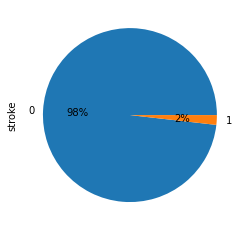

In [24]:
y.value_counts().plot(kind='pie',autopct='%.0f%%')
print(y.value_counts())

# class imbalance in the "stroke" column, with a majority class (no stroke) and a minority class (stroke)

### Categorical Columns

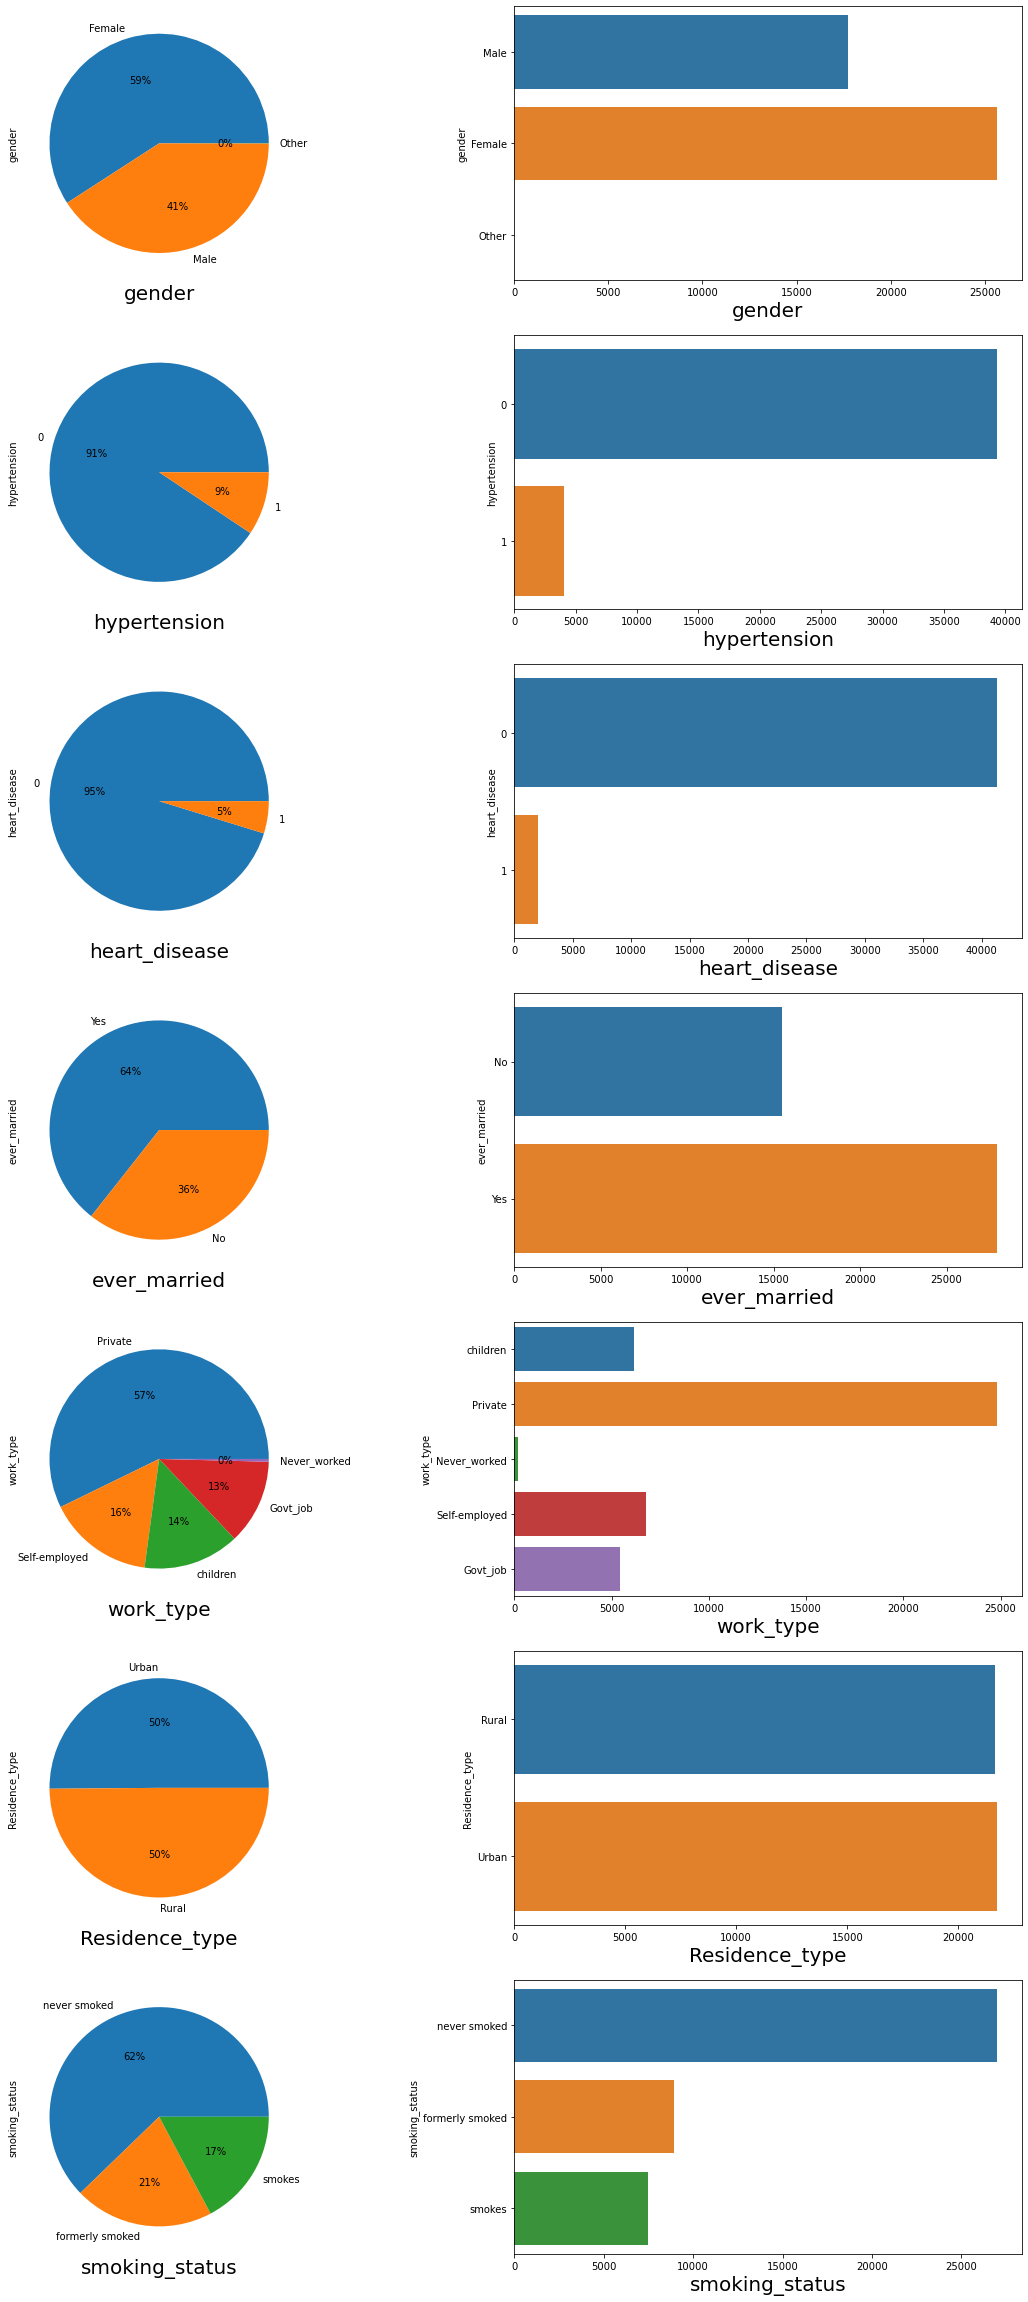

'Demographic Information:\n\nThere are 43,400 unique IDs in the dataset.\nGender has three unique values: Female (25,665), Male (17,724), and Other (11).\nThe dataset includes individuals with diverse ages, with 104 unique age values.\nMost of the individuals do not have hypertension (0: 39,339, 1: 4,061).\nSimilarly, the majority of individuals do not have heart disease (0: 41,338, 1: 2,062).\nA large portion of the individuals are ever married (Yes: 27,938, No: 15,462).\n\nLifestyle and Occupation:\nWork type is divided into five categories, with "Private" being the most common (24,834), \nfollowed by "Self-employed" (6,793), "Children" (6,156), "Govt_job" (5,440), and "Never_worked" (177).\nResidence type is evenly splited between "Urban" (21,756) and "Rural" (21,644).\n\nHealth Parameters:\nThe "avg_glucose_level" feature has 12,543 unique values, indicating a wide range of glucose levels in the dataset.\nBMI (Body Mass Index) also has a diverse set of values, with 1,274 unique ent

In [25]:
plt.figure(figsize=(20,120))
pltonumber = 1
for i in categorical_column:
    if pltonumber<=40:
        if pltonumber % 2 != 0:
            ax = plt.subplot(20,2,pltonumber)
            categorical_column[i].value_counts().plot(kind='pie',autopct='%.0f%%')
            plt.xlabel(i,fontsize=20)
            pltonumber += 1
            
        if pltonumber %2 == 0:
            ax = plt.subplot(20,2,pltonumber)
            sns.countplot(y=categorical_column[i])
            plt.xlabel(i,fontsize=20)
            pltonumber += 1
            
plt.show()
'''Demographic Information:

There are 43,400 unique IDs in the dataset.
Gender has three unique values: Female (25,665), Male (17,724), and Other (11).
The dataset includes individuals with diverse ages, with 104 unique age values.
Most of the individuals do not have hypertension (0: 39,339, 1: 4,061).
Similarly, the majority of individuals do not have heart disease (0: 41,338, 1: 2,062).
A large portion of the individuals are ever married (Yes: 27,938, No: 15,462).

Lifestyle and Occupation:
Work type is divided into five categories, with "Private" being the most common (24,834), 
followed by "Self-employed" (6,793), "Children" (6,156), "Govt_job" (5,440), and "Never_worked" (177).
Residence type is evenly splited between "Urban" (21,756) and "Rural" (21,644).

Health Parameters:
The "avg_glucose_level" feature has 12,543 unique values, indicating a wide range of glucose levels in the dataset.
BMI (Body Mass Index) also has a diverse set of values, with 1,274 unique entries.
Smoking status is categorized into three groups: "never smoked" (26,927), "formerly smoked" (8,988), and "smokes" (7,485).

Class Imbalance:
The target variable, "stroke," exhibits a class imbalance, 
with a majority of individuals (no stroke) and a minority experiencing a stroke. 
'''

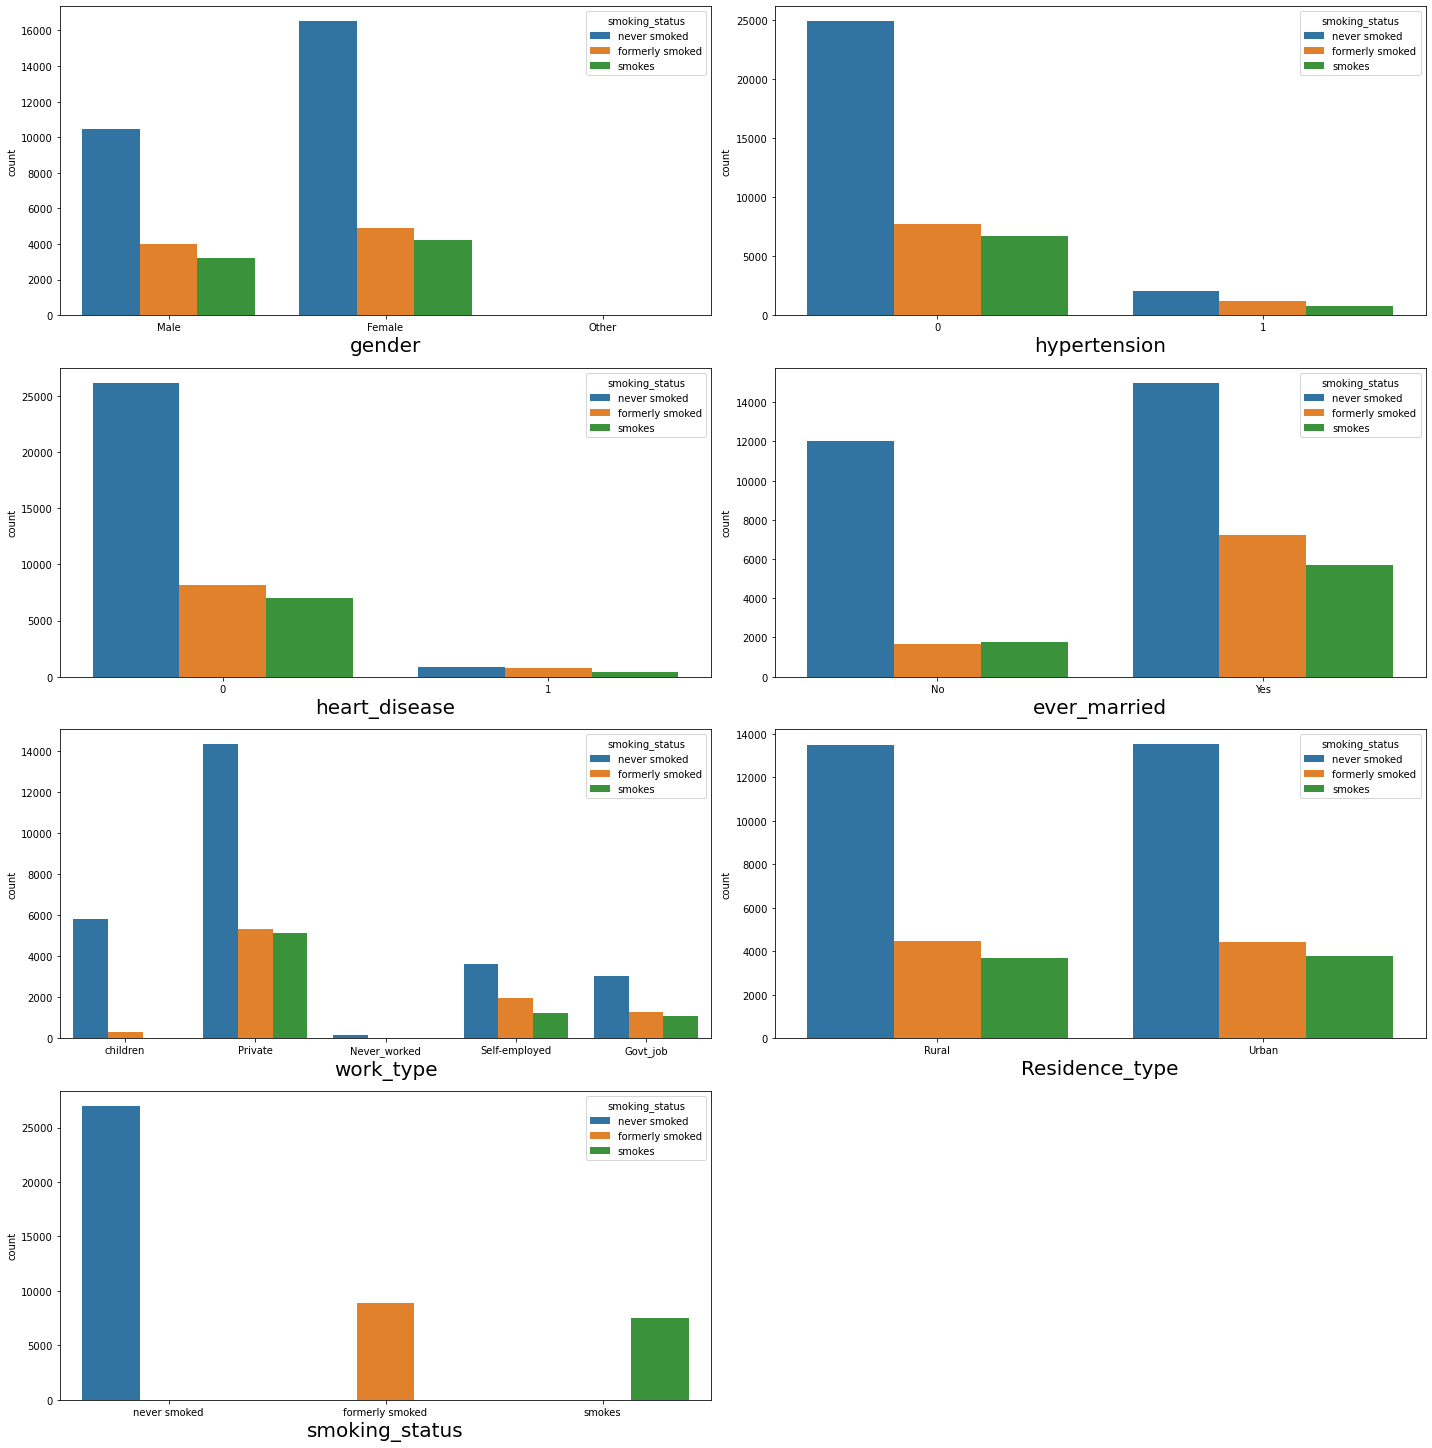

In [26]:
plt.figure(figsize=(20,100))
pltonumber = 1
for i in categorical_column:
    if pltonumber<=40:
        ax = plt.subplot(20,2,pltonumber)
        sns.countplot(x=i,hue=categorical_column['smoking_status'],data = categorical_column)
        plt.xlabel(i,fontsize=20)
        pltonumber += 1
plt.tight_layout()                   
plt.show()

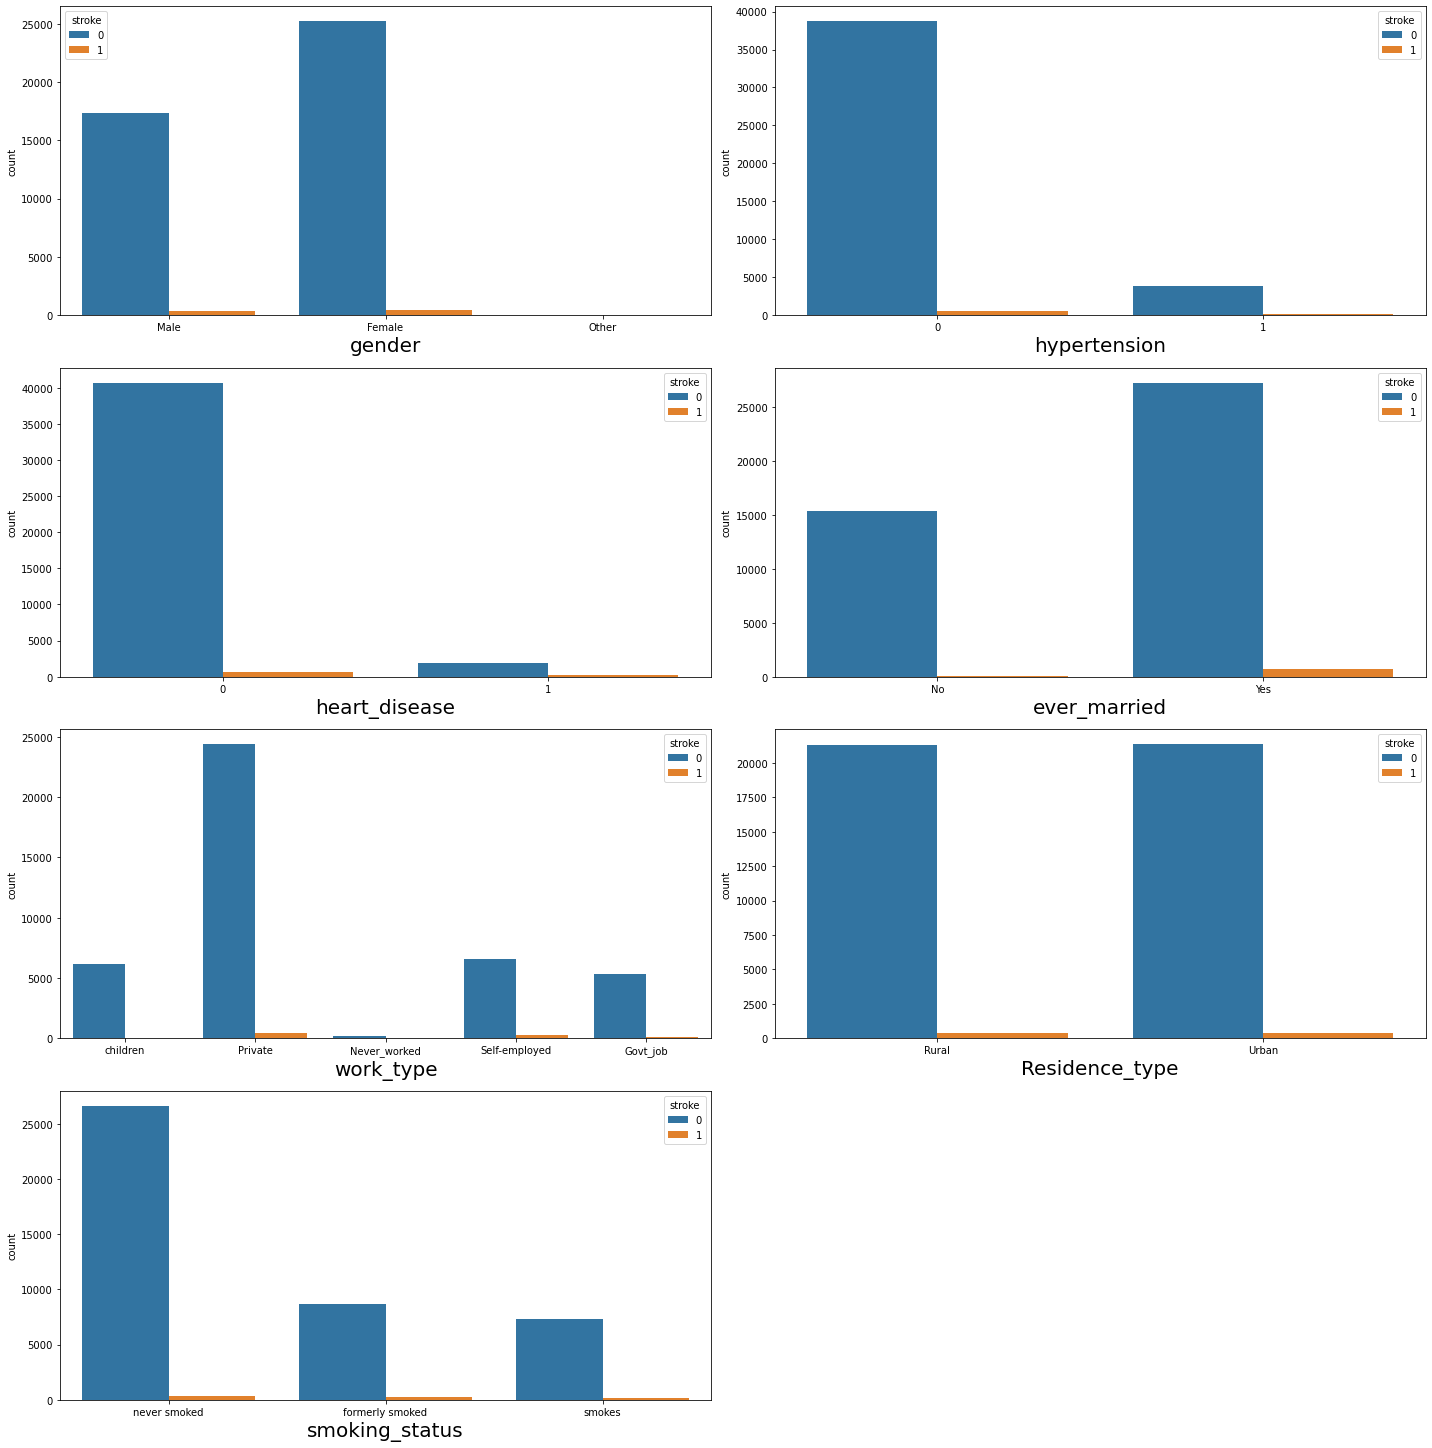

In [27]:
plt.figure(figsize=(20,100))
pltonumber = 1
for i in categorical_column:
    if pltonumber<=40:
        ax = plt.subplot(20,2,pltonumber)
        sns.countplot(i,hue=y,data = categorical_column)
        plt.xlabel(i,fontsize=20)
        pltonumber += 1
plt.tight_layout()                   
plt.show()

### Numaric columns

<Figure size 1080x1080 with 0 Axes>

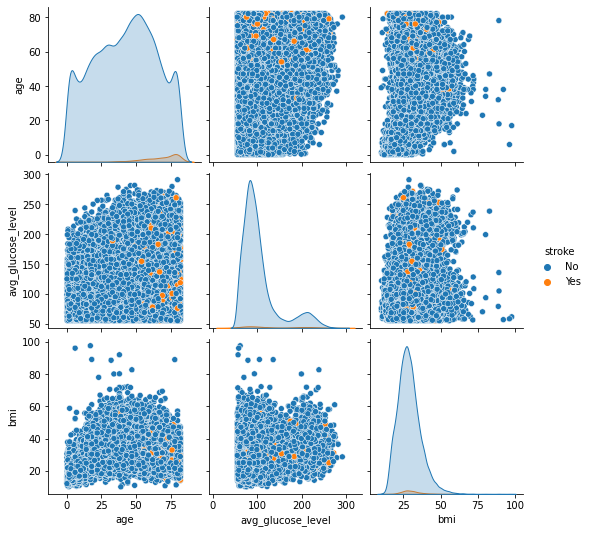

In [28]:
# Replace value 0 with NO and 1 with Yes for better understanding
y_str = y.replace({0:'No',1:'Yes'})

# Merge 'y_df' with 'numaric_column' using the index
merged_data = pd.concat([numaric_column, y_str], axis=1)

plt.figure(figsize=(15, 15))
sns.pairplot(merged_data, hue='stroke',)
plt.show()

<Figure size 1080x1080 with 0 Axes>

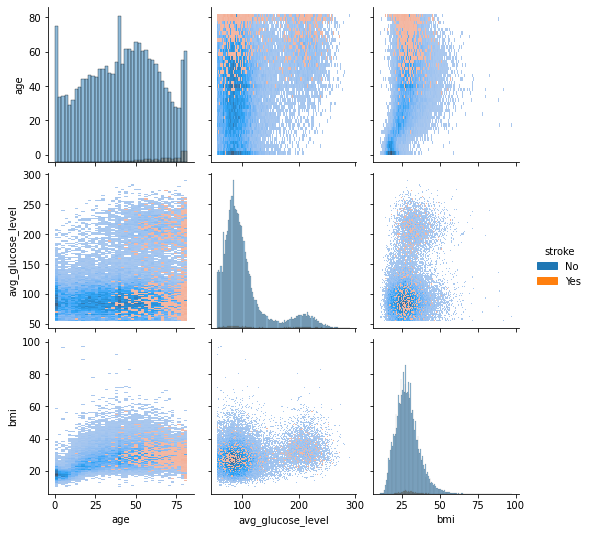

In [29]:
plt.figure(figsize=(15, 15))
sns.pairplot(merged_data, hue='stroke',kind='hist')
plt.show()

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

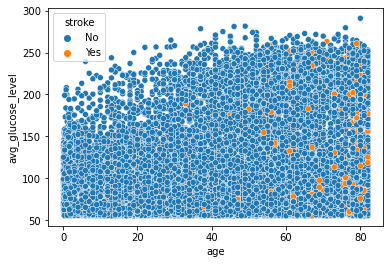

In [30]:
sns.scatterplot(merged_data['age'],merged_data['avg_glucose_level'],hue=merged_data['stroke'])

<AxesSubplot:xlabel='age', ylabel='bmi'>

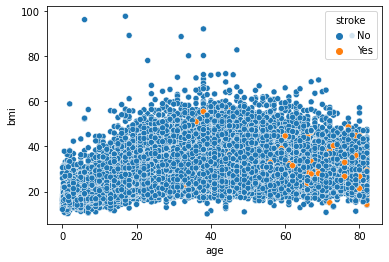

In [31]:
sns.scatterplot(merged_data['age'],merged_data['bmi'],hue=merged_data['stroke'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

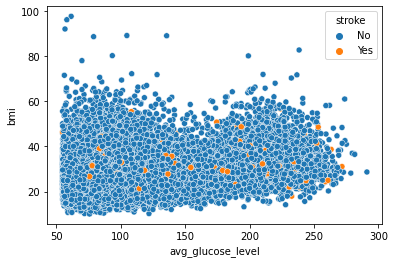

In [32]:
sns.scatterplot(merged_data['avg_glucose_level'],merged_data['bmi'],hue=merged_data['stroke'])

### Numaric columns ralation with Target variable

<AxesSubplot:xlabel='stroke', ylabel='age'>

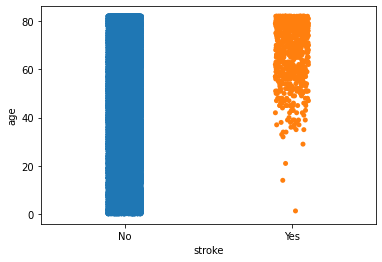

In [33]:
sns.stripplot(x='stroke', y='age',data = merged_data)
# The relationship between age and stroke is positive, meaning that as age increases,
# the likelihood of experiencing a stroke also increases. 

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

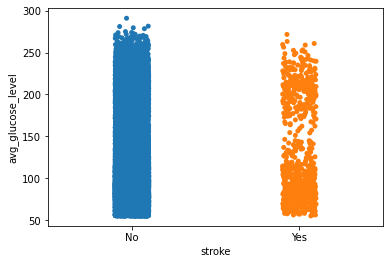

In [34]:
sns.stripplot(x='stroke', y=merged_data['avg_glucose_level'],data = merged_data)

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

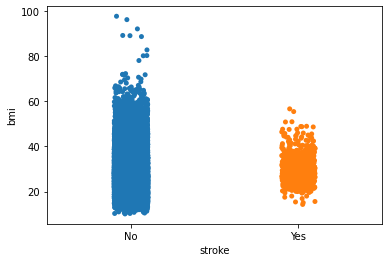

In [35]:
sns.stripplot(x='stroke', y=merged_data['bmi'],data = merged_data)

### Relationship between categorical and numaric column

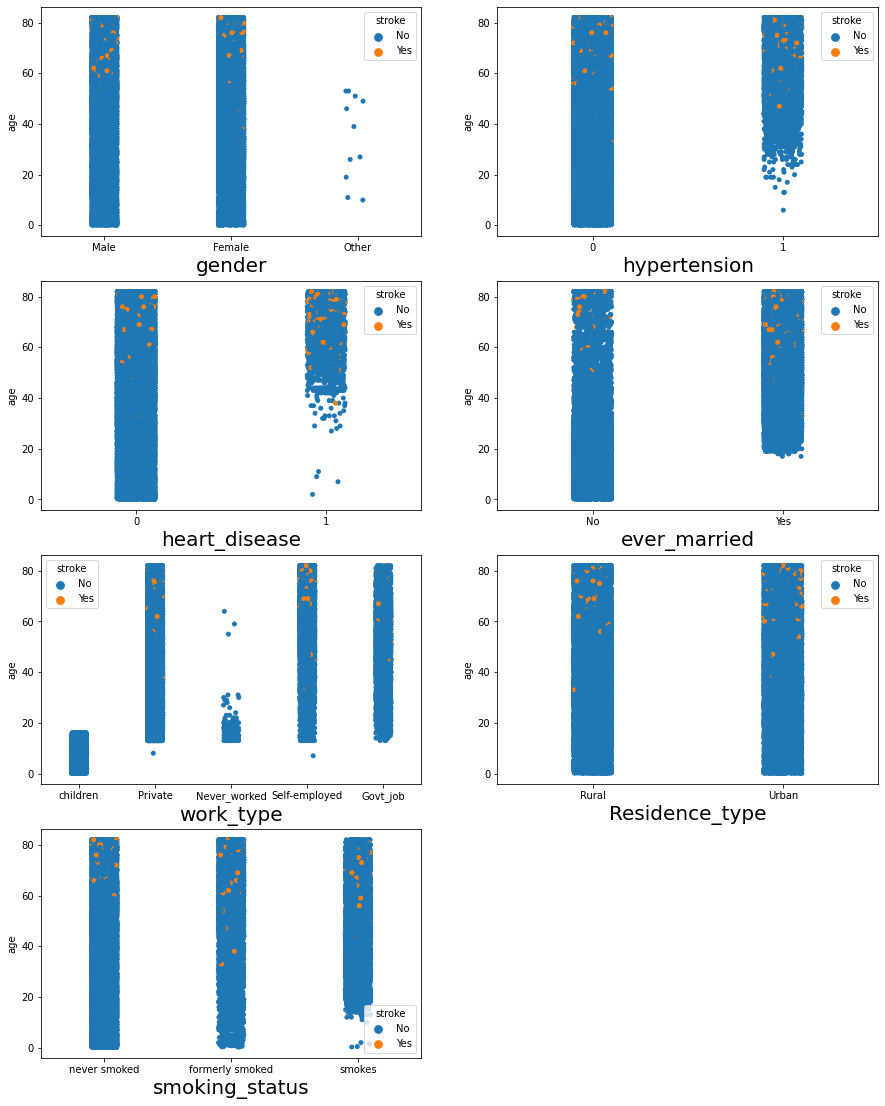

In [36]:
plt.figure(figsize=(15,100))
pltonumber = 1
for i in categorical_column:
    if pltonumber<=40:
        ax = plt.subplot(20,2,pltonumber)
        sns.stripplot(x =i,y=merged_data['age'],hue=y_str,data = categorical_column)
        plt.xlabel(i,fontsize=20)
        pltonumber += 1                   
plt.show()

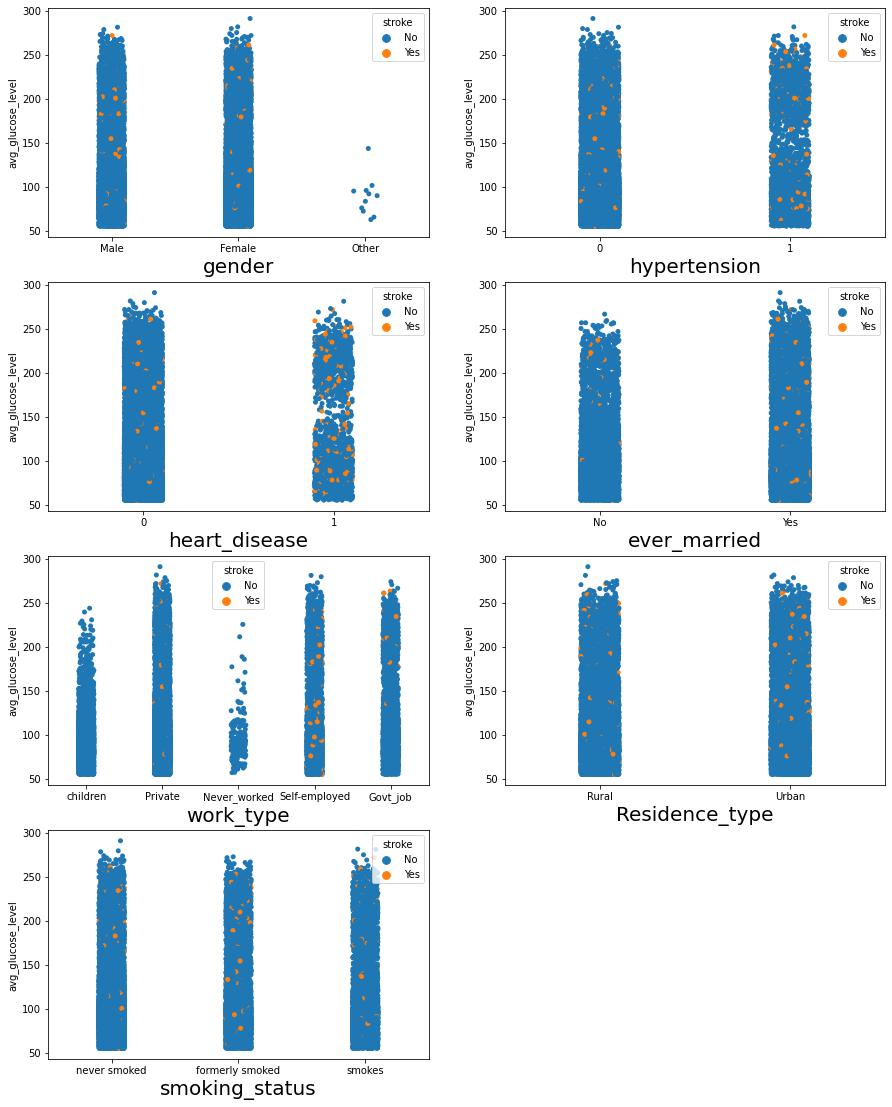

In [37]:
plt.figure(figsize=(15,100))
pltonumber = 1
for i in categorical_column:
    if pltonumber<=40:
        ax = plt.subplot(20,2,pltonumber)
        sns.stripplot(x =i,y=merged_data['avg_glucose_level'],hue=y_str,data = categorical_column)
        plt.xlabel(i,fontsize=20)
        pltonumber += 1                   
plt.show()

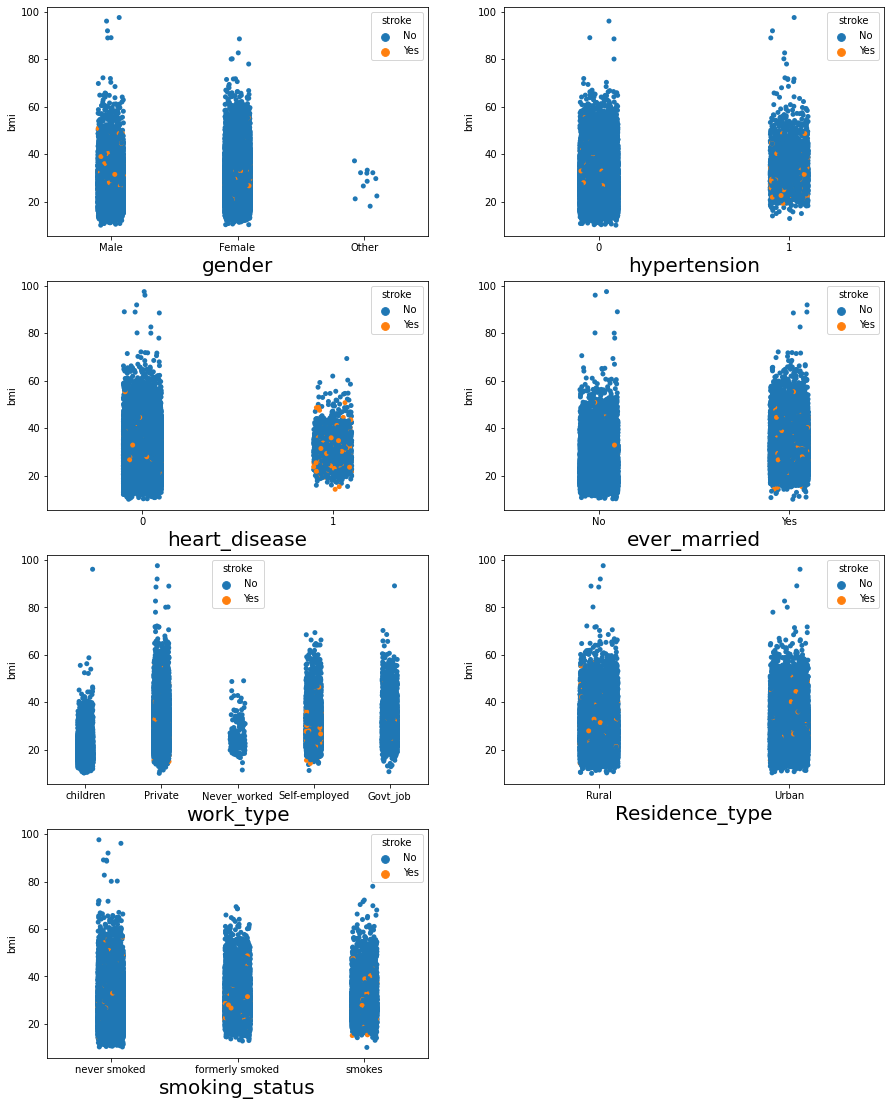

In [38]:
plt.figure(figsize=(15,100))
pltonumber = 1
for i in categorical_column:
    if pltonumber<=40:
        ax = plt.subplot(20,2,pltonumber)
        sns.stripplot(x =i,y=merged_data['bmi'],hue=y_str,data = categorical_column)
        plt.xlabel(i,fontsize=20)
        pltonumber += 1                   
plt.show()

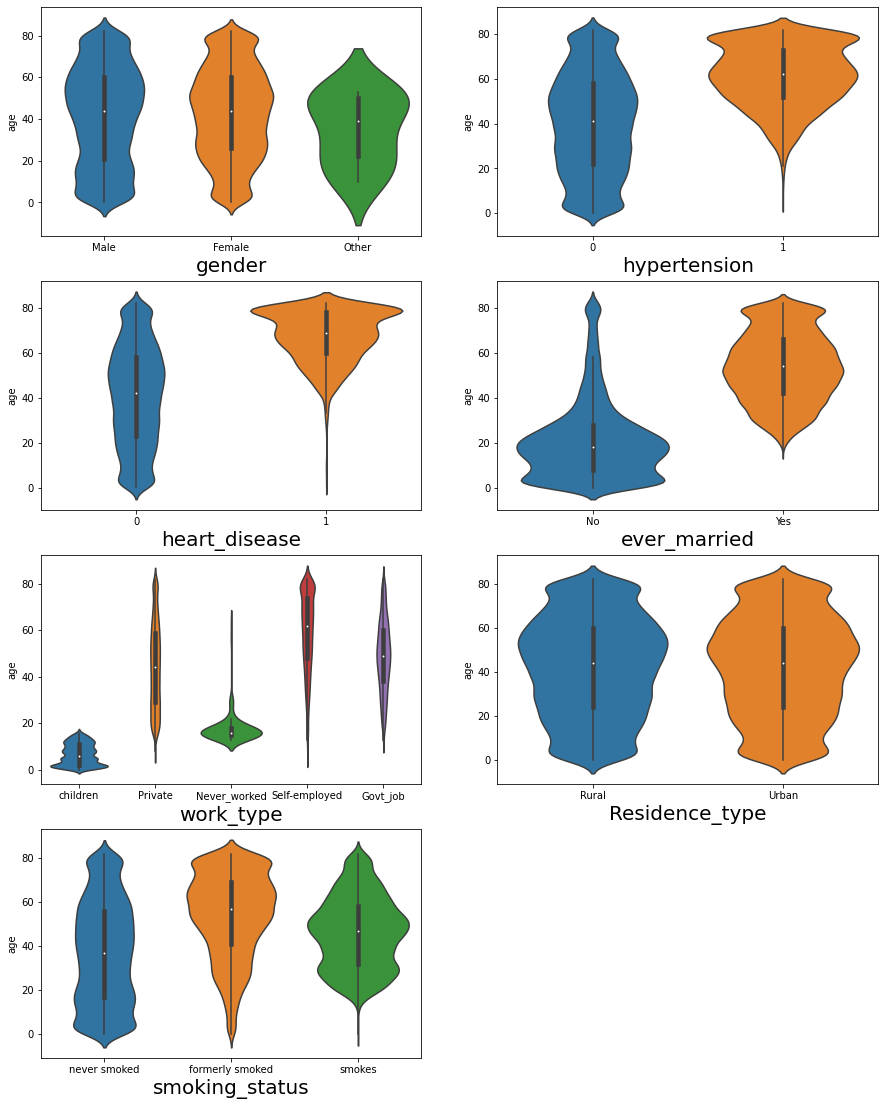

In [39]:
plt.figure(figsize=(15,100))
pltonumber = 1
for i in categorical_column:
    if pltonumber<=40:
        ax = plt.subplot(20,2,pltonumber)
        sns.violinplot(data=x, x=i, y='age')
        plt.xlabel(i,fontsize=20)
        pltonumber += 1                   
plt.show()
'''people having Hypertension and age above 50 has high risk of strok
majority of hear diseased people are above 40 year
most of smokers are above 15 years'''

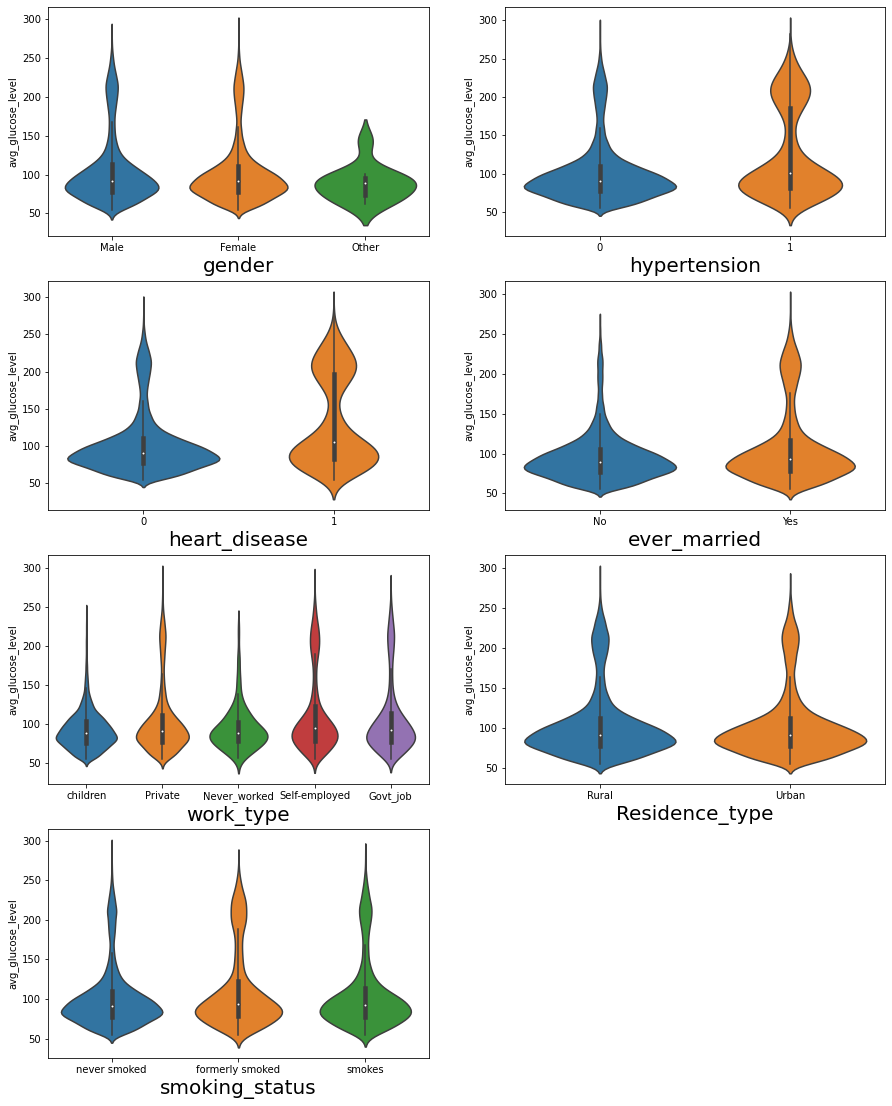

In [40]:
plt.figure(figsize=(15,100))
pltonumber = 1
for i in categorical_column:
    if pltonumber<=40:
        ax = plt.subplot(20,2,pltonumber)
        sns.violinplot(data=x, x=i, y='avg_glucose_level')
        plt.xlabel(i,fontsize=20)
        pltonumber += 1                   
plt.show()

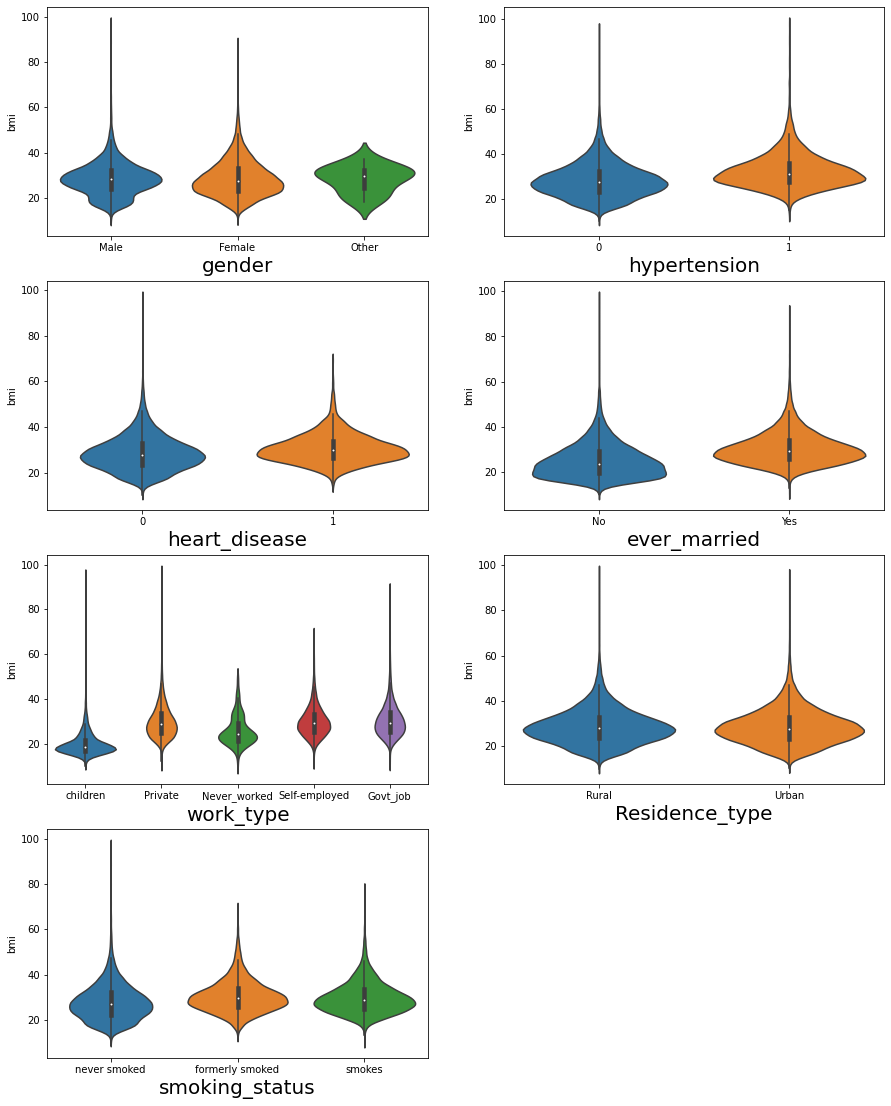

In [41]:
plt.figure(figsize=(15,100))
pltonumber = 1
for i in categorical_column:
    if pltonumber<=40:
        ax = plt.subplot(20,2,pltonumber)
        sns.violinplot(data=x, x=i, y='bmi')
        plt.xlabel(i,fontsize=20)
        pltonumber += 1                   
plt.show()

In [42]:
# Underweight: BMI less than 18.5
# Normal weight: BMI between 18.5 and 24.9
# Overweight: BMI between 25 and 29.9
# Obese: BMI greater than or equal to 30
# Morbidly obese: BMI of 40 or higher
bin_edges = [0, 18.5, 25, 30, 40, 98]
bin_labels = ['Underweight', 'Normal', 'Overweight','Obese','Morbidly obese']

merged_data['bin_column'] = pd.cut(merged_data['bmi'], bins=bin_edges, labels=bin_labels)

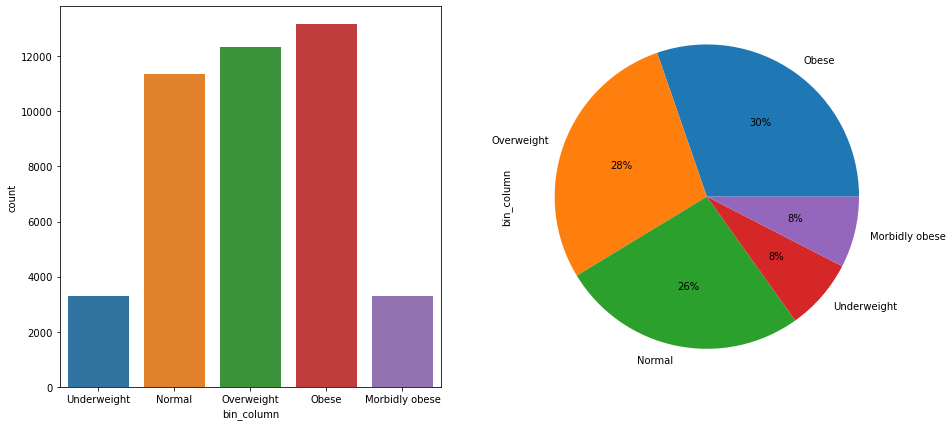

''

In [43]:
plt.figure(figsize=(15,7))

ax = plt.subplot(1,2,1)
sns.countplot(merged_data['bin_column'])

ax = plt.subplot(1,2,2)
merged_data['bin_column'].value_counts().plot(kind='pie',autopct='%.0f%%')

plt.show()

'''The data shows that the majority of individuals fall into the "Normal" weight category, 
with a relatively low number of strokes.
"Obese" individuals have a significant representation in the dataset, and they also experience a higher number of strokes'''

In [44]:
pd.crosstab(merged_data['bin_column'],merged_data['stroke'])

stroke,No,Yes
bin_column,,
Underweight,3282,8
Normal,11213,145
Overweight,12033,290
Obese,12859,289
Morbidly obese,3230,51


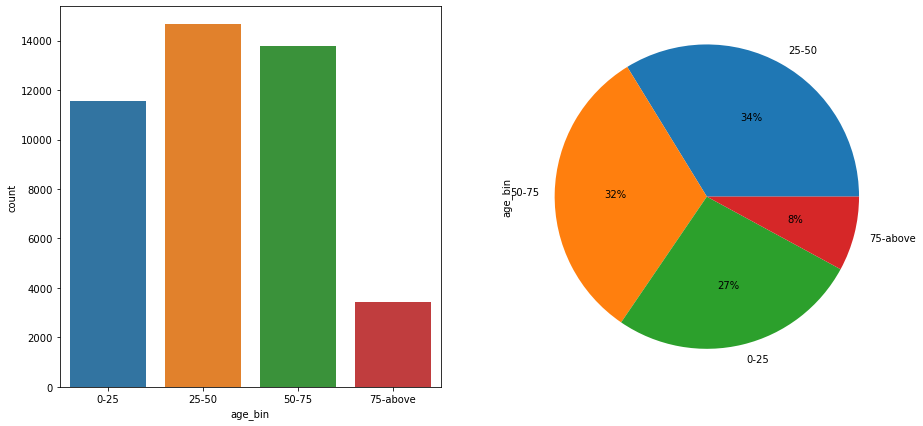

In [45]:
bin_edges = [0, 25, 50, 75, 100]
bin_labels = ['0-25', '25-50', '50-75','75-above']

merged_data['age_bin'] = pd.cut(merged_data['age'], bins=bin_edges, labels=bin_labels)

plt.figure(figsize=(15,7))

ax = plt.subplot(1,2,1)
sns.countplot(merged_data['age_bin'])

ax = plt.subplot(1,2,2)
merged_data['age_bin'].value_counts().plot(kind='pie',autopct='%.0f%%')

plt.show()

<AxesSubplot:xlabel='age_bin', ylabel='count'>

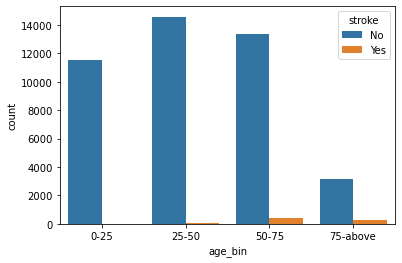

In [46]:
sns.countplot(merged_data['age_bin'],hue=merged_data['stroke'])
'''The majority of stroke cases occur in the "50-75" age group, with 405 cases.
There are only a few cases in the "0-25" age group, with just 3 cases.
The "75-above" age group also shows a significant number of stroke cases, with 303 cases.
The "25-50" age group has a moderate number of stroke cases, with 72 cases.

This data indicates that stroke occurrence is relatively rare in the "0-25" age group but increases significantly in older age groups, 
particularly in the "50-75" and "75-above" groups.'''

In [47]:
pd.crosstab(merged_data['age_bin'],merged_data['stroke'])

stroke,No,Yes
age_bin,,
0-25,11543,3
25-50,14580,72
50-75,13361,405
75-above,3133,303


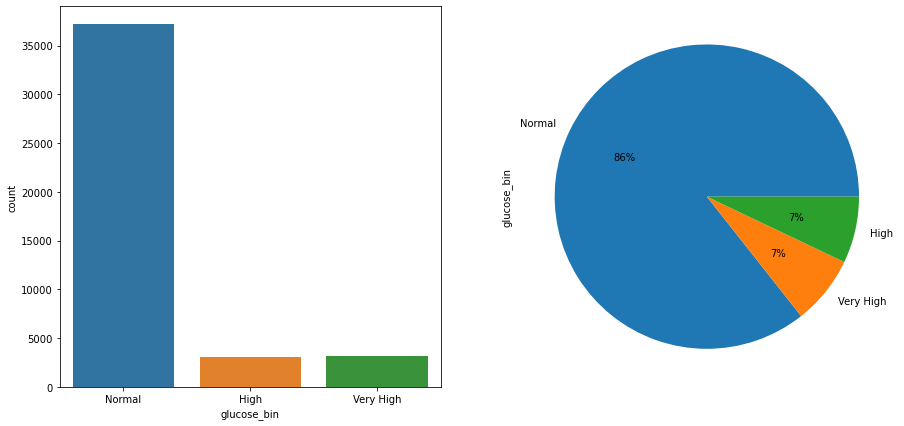

In [48]:
bin_edges = [0, 140, 200, 300]
bin_labels = ['Normal', 'High', 'Very High']

merged_data['glucose_bin'] = pd.cut(merged_data['avg_glucose_level'], bins=bin_edges, labels=bin_labels)

plt.figure(figsize=(15,7))

ax = plt.subplot(1,2,1)
sns.countplot(merged_data['glucose_bin'])

ax = plt.subplot(1,2,2)
merged_data['glucose_bin'].value_counts().plot(kind='pie',autopct='%.0f%%')

plt.show()
'''Individuals with "Normal" glucose levels have a relatively low occurrence of strokes, with 510 cases.
The "High" glucose level group exhibits a moderate number of stroke cases, with 105 cases.
The "Very High" glucose level group has a higher number of stroke cases, with 168 cases.'''

In [49]:
pd.crosstab(merged_data['glucose_bin'],merged_data['stroke'])

stroke,No,Yes
glucose_bin,,
Normal,36655,510
High,2962,105
Very High,3000,168


### Feature engineering

In [50]:
x.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked


In [51]:
merged_data.head()

,age,avg_glucose_level,bmi,stroke,bin_column,age_bin,glucose_bin
0,3.0,95.12,18.0,No,Underweight,0-25,Normal
1,58.0,87.96,39.2,No,Obese,50-75,Normal
2,8.0,110.89,17.6,No,Underweight,0-25,Normal
3,70.0,69.04,35.9,No,Obese,50-75,Normal
4,14.0,161.28,19.1,No,Normal,0-25,High


In [52]:
x['bmi_bins']=merged_data['bin_column']
x['age_bins']=merged_data['age_bin']
x['glucose_level']=merged_data['glucose_bin']

x.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_bins,age_bins,glucose_level
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,Underweight,0-25,Normal
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,Obese,50-75,Normal
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,Underweight,0-25,Normal
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,Obese,50-75,Normal
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,Normal,0-25,High


In [53]:
numaric_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                43400 non-null  float64
 1   avg_glucose_level  43400 non-null  float64
 2   bmi                43400 non-null  float64
dtypes: float64(3)
memory usage: 1017.3 KB


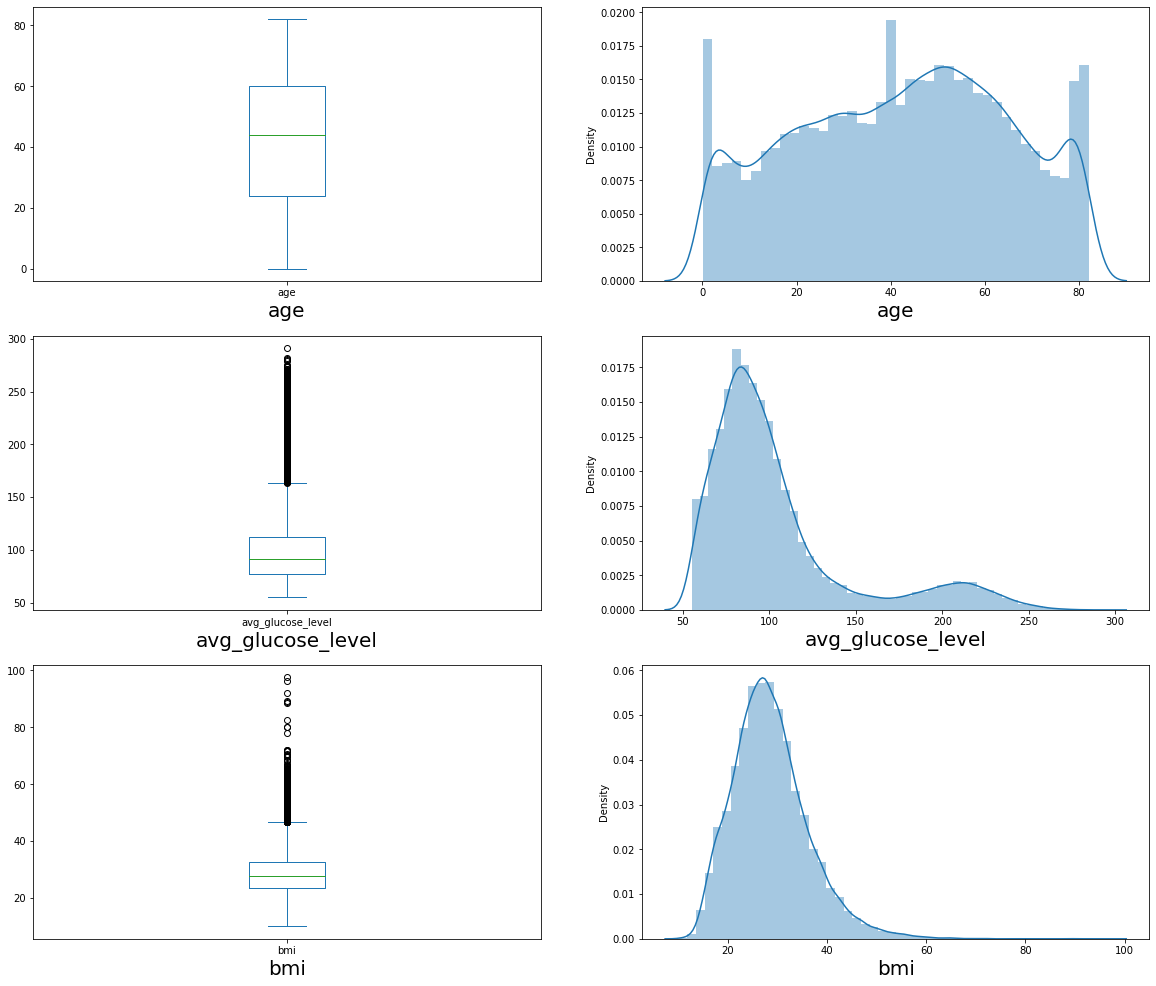

In [54]:
plt.figure(figsize=(20,120))
pltonumber = 1
for i in numaric_column:
    if pltonumber<=40:
        if pltonumber % 2 != 0:
            ax = plt.subplot(20,2,pltonumber)
            numaric_column[i].plot(kind='box')
            plt.xlabel(i,fontsize=20)
            pltonumber += 1
            
        if pltonumber %2 == 0:
            ax = plt.subplot(20,2,pltonumber)
            sns.distplot(numaric_column[i])
            plt.xlabel(i,fontsize=20)
            pltonumber += 1
            
plt.show()

In [55]:
x.shape

(43400, 14)

In [56]:
from scipy import stats

z_scores = np.abs(stats.zscore(x['avg_glucose_level']))

# Set a threshold for the Z-score to identify outliers
threshold = 2.5 

outlier_indices = np.where(z_scores > threshold)

data_no_outliers = x[z_scores <= threshold]

In [57]:
data_no_outliers.shape

(41244, 14)

In [58]:

print(f'Remaining after removing outliers: {(data_no_outliers.shape[0] / x.shape[0]) * 100}%')


Remaining after removing outliers: 95.03225806451613%


In [59]:
data_no_outliers['avg_glucose_level'] = np.log(data_no_outliers['avg_glucose_level'])

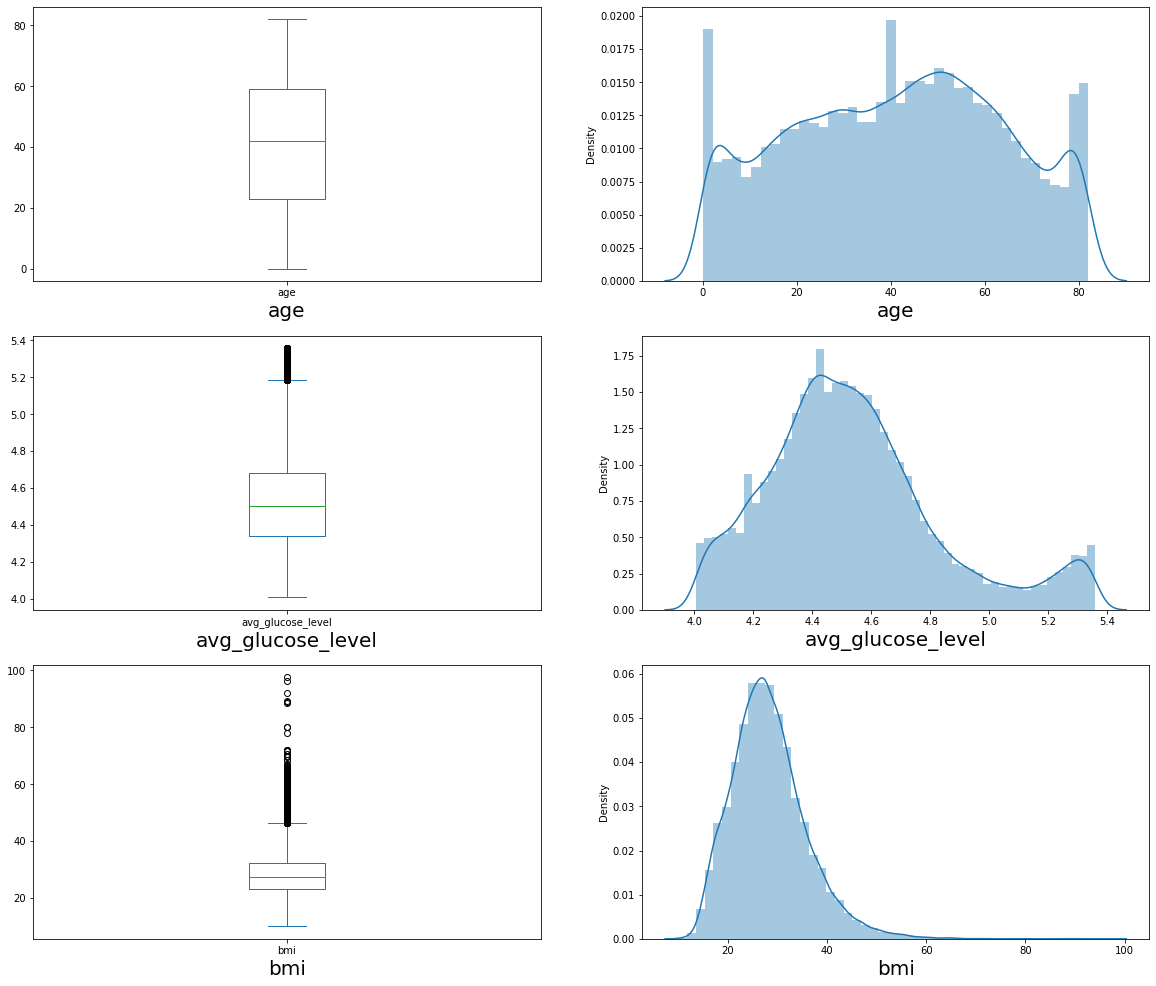

In [60]:
plt.figure(figsize=(20,120))
pltonumber = 1
for i in numaric_column:
    if pltonumber<=40:
        if pltonumber % 2 != 0:
            ax = plt.subplot(20,2,pltonumber)
            data_no_outliers[i].plot(kind='box')
            plt.xlabel(i,fontsize=20)
            pltonumber += 1
            
        if pltonumber %2 == 0:
            ax = plt.subplot(20,2,pltonumber)
            sns.distplot(data_no_outliers[i])
            plt.xlabel(i,fontsize=20)
            pltonumber += 1
            
plt.show()

In [61]:
data_no_outliers.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_bins,age_bins,glucose_level
0,30669,Male,3.0,0,0,No,children,Rural,4.555139,18.0,never smoked,Underweight,0-25,Normal
1,30468,Male,58.0,1,0,Yes,Private,Urban,4.476882,39.2,never smoked,Obese,50-75,Normal
2,16523,Female,8.0,0,0,No,Private,Urban,4.708539,17.6,never smoked,Underweight,0-25,Normal
3,56543,Female,70.0,0,0,Yes,Private,Rural,4.234686,35.9,formerly smoked,Obese,50-75,Normal
4,46136,Male,14.0,0,0,No,Never_worked,Rural,5.083142,19.1,never smoked,Normal,0-25,High


#### outliers removing with IQR

In [62]:
q1 = data_no_outliers.quantile(0.25)

q3 = data_no_outliers.quantile(0.75)

# inter quantile renge
iqr = q3 - q1

In [63]:
# outliers in bmi
bmi_high = q3.bmi + (1.5 * iqr.bmi)
bmi_high

index_bmi = np.where(data_no_outliers["bmi"] > bmi_high)
print(index_bmi)

(array([    5,     8,    20,    75,    82,    98,   108,   153,   155,
         168,   198,   202,   214,   228,   278,   283,   332,   356,
         371,   396,   407,   449,   493,   536,   592,   659,   732,
         791,   805,   955,   982,  1019,  1037,  1207,  1234,  1259,
        1264,  1275,  1284,  1295,  1339,  1357,  1585,  1674,  1703,
        1756,  1811,  1818,  1910,  1953,  1959,  1979,  2000,  2061,
        2079,  2107,  2202,  2212,  2224,  2242,  2369,  2407,  2457,
        2482,  2523,  2533,  2536,  2661,  2850,  2870,  2875,  2939,
        2966,  3130,  3162,  3209,  3302,  3317,  3437,  3479,  3531,
        3542,  3675,  3727,  3755,  3787,  3809,  3823,  3825,  3943,
        3996,  3998,  4044,  4116,  4215,  4229,  4269,  4281,  4351,
        4409,  4418,  4428,  4477,  4522,  4574,  4621,  4666,  4679,
        4738,  4743,  4761,  4929,  5099,  5142,  5258,  5371,  5440,
        5495,  5502,  5626,  5743,  5785,  5823,  5889,  5947,  5981,
        5982,  6001

In [64]:
data_no_outliers = data_no_outliers.drop(data_no_outliers.index[index_bmi])
print(data_no_outliers.shape)
data_no_outliers.reset_index()

(40299, 14)


,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_bins,age_bins,glucose_level
0,0,30669,Male,3.0,0,0,No,children,Rural,4.555139,18.0,never smoked,Underweight,0-25,Normal
1,1,30468,Male,58.0,1,0,Yes,Private,Urban,4.476882,39.2,never smoked,Obese,50-75,Normal
2,2,16523,Female,8.0,0,0,No,Private,Urban,4.708539,17.6,never smoked,Underweight,0-25,Normal
3,3,56543,Female,70.0,0,0,Yes,Private,Rural,4.234686,35.9,formerly smoked,Obese,50-75,Normal
4,4,46136,Male,14.0,0,0,No,Never_worked,Rural,5.083142,19.1,never smoked,Normal,0-25,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40294,43394,52380,Male,47.0,0,0,No,Govt_job,Urban,4.227126,25.2,formerly smoked,Overweight,25-50,Normal
40295,43395,56196,Female,10.0,0,0,No,children,Urban,4.071417,20.4,never smoked,Normal,0-25,Normal
40296,43397,28375,Female,82.0,1,0,Yes,Private,Urban,4.521136,28.9,formerly smoked,Overweight,75-above,Normal
40297,43398,27973,Male,40.0,0,0,Yes,Private,Urban,4.596735,33.2,never smoked,Obese,25-50,Normal


In [65]:
numaric_column.shape

(43400, 3)

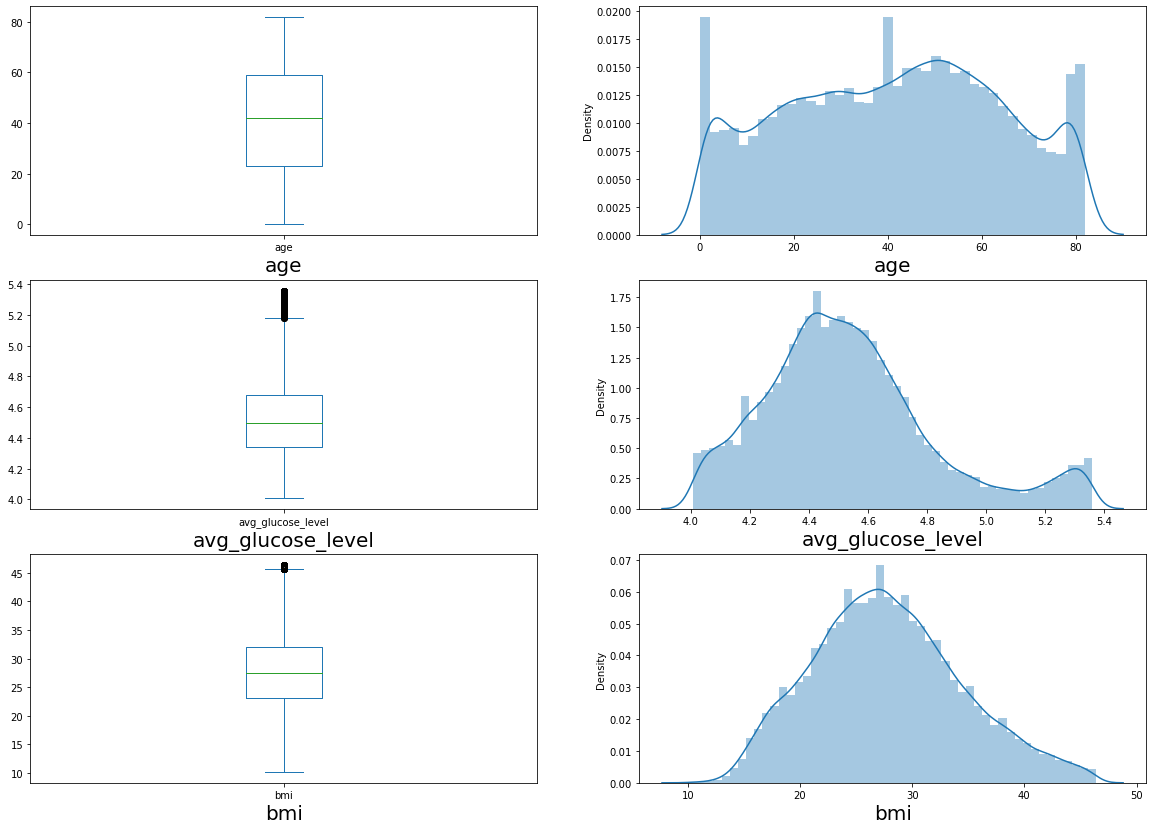

In [66]:
plt.figure(figsize=(20,100))
pltonumber = 1
for i in numaric_column:
    if pltonumber<=40:
        if pltonumber % 2 != 0:
            ax = plt.subplot(20,2,pltonumber)
            data_no_outliers[i].plot(kind='box')
            plt.xlabel(i,fontsize=20)
            pltonumber += 1
            
        if pltonumber %2 == 0:
            ax = plt.subplot(20,2,pltonumber)
            sns.distplot(data_no_outliers[i])
            plt.xlabel(i,fontsize=20)
            pltonumber += 1
            
plt.show()

In [67]:
print(f'Remaining after removing outliers: {(data_no_outliers.shape[0] / x.shape[0]) * 100}%')

Remaining after removing outliers: 92.85483870967742%


In [68]:
data_no_outliers.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_bins,age_bins,glucose_level
0,30669,Male,3.0,0,0,No,children,Rural,4.555139,18.0,never smoked,Underweight,0-25,Normal
1,30468,Male,58.0,1,0,Yes,Private,Urban,4.476882,39.2,never smoked,Obese,50-75,Normal
2,16523,Female,8.0,0,0,No,Private,Urban,4.708539,17.6,never smoked,Underweight,0-25,Normal
3,56543,Female,70.0,0,0,Yes,Private,Rural,4.234686,35.9,formerly smoked,Obese,50-75,Normal
4,46136,Male,14.0,0,0,No,Never_worked,Rural,5.083142,19.1,never smoked,Normal,0-25,High


In [69]:
# feature encoding

In [70]:
# Convert categorical columns to dummy variables
categorical_columns = [ 'work_type', 'smoking_status','bmi_bins']
data_no_outliers = pd.get_dummies(data_no_outliers, columns=categorical_columns)

# binary columns for each category in the specified columns.
data_no_outliers.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_bins,...,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_bins_Underweight,bmi_bins_Normal,bmi_bins_Overweight,bmi_bins_Obese,bmi_bins_Morbidly obese
0,30669,Male,3.0,0,0,No,Rural,4.555139,18.0,0-25,...,0,1,0,1,0,1,0,0,0,0
1,30468,Male,58.0,1,0,Yes,Urban,4.476882,39.2,50-75,...,0,0,0,1,0,0,0,0,1,0
2,16523,Female,8.0,0,0,No,Urban,4.708539,17.6,0-25,...,0,0,0,1,0,1,0,0,0,0
3,56543,Female,70.0,0,0,Yes,Rural,4.234686,35.9,50-75,...,0,0,1,0,0,0,0,0,1,0
4,46136,Male,14.0,0,0,No,Rural,5.083142,19.1,0-25,...,0,0,0,1,0,0,1,0,0,0


In [71]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

df_gender = label_enc.fit_transform(data_no_outliers['gender'])
df_married = label_enc.fit_transform(data_no_outliers['ever_married'])
df_resident = label_enc.fit_transform(data_no_outliers['Residence_type'])
df_age = label_enc.fit_transform(data_no_outliers['age_bins'])
df_glucose = label_enc.fit_transform(data_no_outliers['glucose_level'])

pd.Series(df_gender)
data_no_outliers['gender'] = df_gender

pd.Series(df_married)
data_no_outliers['ever_married'] = df_married

pd.Series(df_resident)
data_no_outliers['Residence_type'] = df_resident

pd.Series(df_age)
data_no_outliers['age_bins'] = df_age

pd.Series(df_glucose)
data_no_outliers['glucose_level'] = df_glucose

data_no_outliers.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_bins,...,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_bins_Underweight,bmi_bins_Normal,bmi_bins_Overweight,bmi_bins_Obese,bmi_bins_Morbidly obese
0,30669,1,3.0,0,0,0,0,4.555139,18.0,0,...,0,1,0,1,0,1,0,0,0,0
1,30468,1,58.0,1,0,1,1,4.476882,39.2,2,...,0,0,0,1,0,0,0,0,1,0
2,16523,0,8.0,0,0,0,1,4.708539,17.6,0,...,0,0,0,1,0,1,0,0,0,0
3,56543,0,70.0,0,0,1,0,4.234686,35.9,2,...,0,0,1,0,0,0,0,0,1,0
4,46136,1,14.0,0,0,0,0,5.083142,19.1,0,...,0,0,0,1,0,0,1,0,0,0


### feature selection

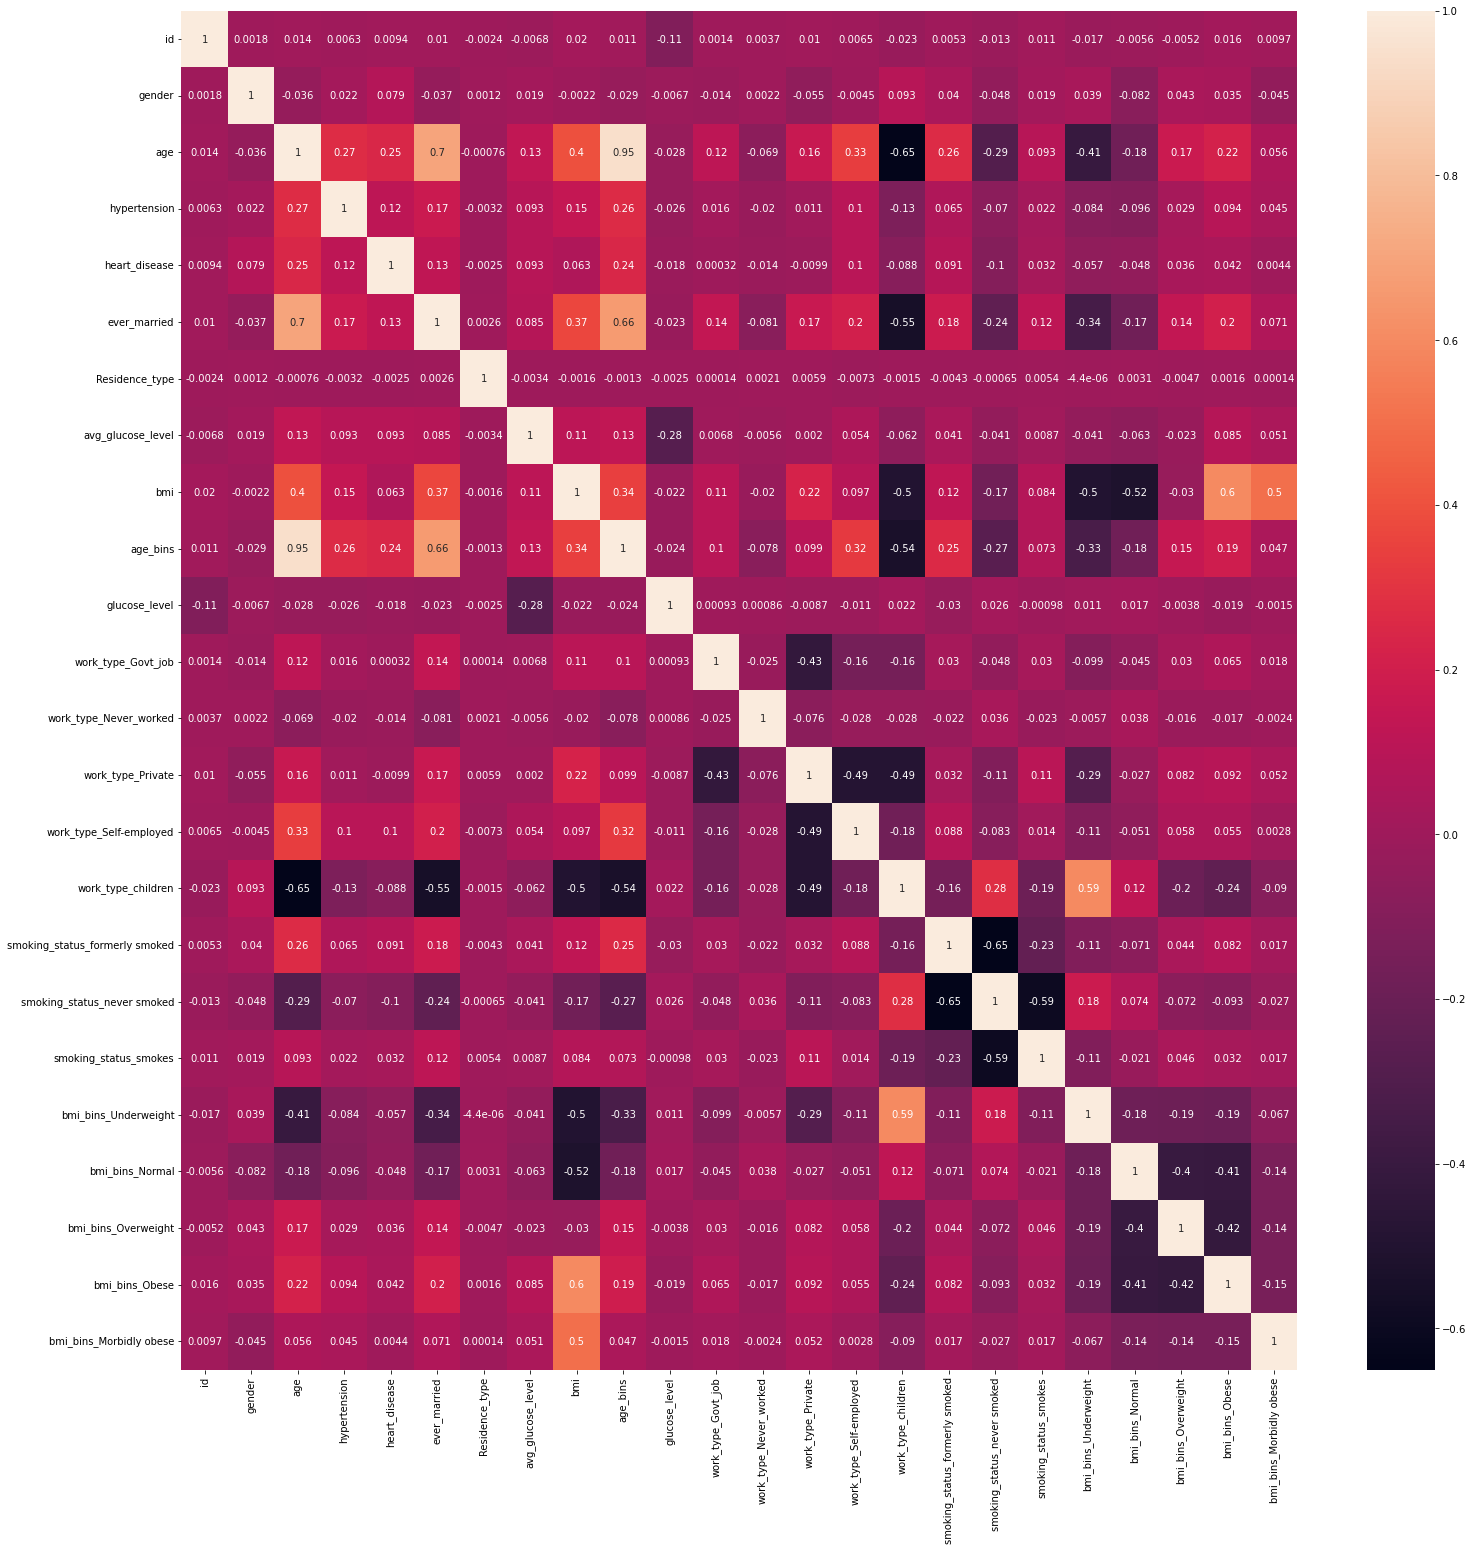

In [72]:
plt.figure(figsize=(25,25))
sns.heatmap(data_no_outliers.corr(),annot=True)
plt.show()

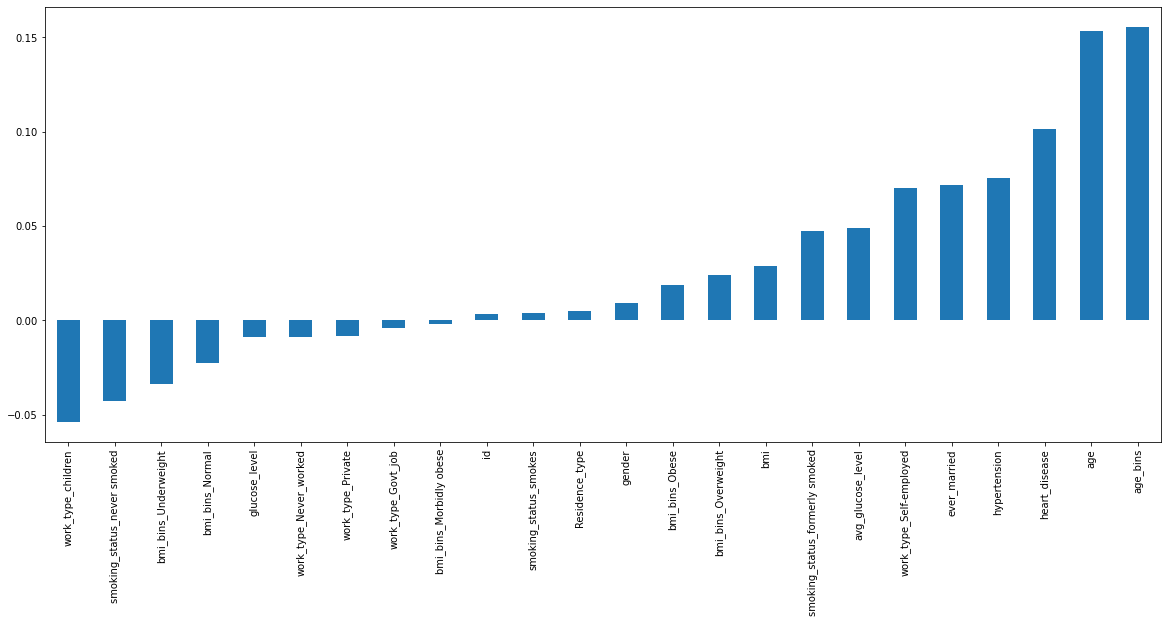

In [73]:
data_no_outliers['stroke'] = y
plt.figure(figsize=(20,8))
data_no_outliers.corr()["stroke"].sort_values().drop(["stroke"]).plot(kind = "bar")
plt.show()

In [74]:
data_no_outliers.corr()["stroke"].sort_values().drop(["stroke"])

#Observation
'''
Negative Coefficients (Lower Stroke Risk):
"work_type_children" - Having children in the workforce is associated with a lower stroke risk.
"smoking_status_never smoked" - Never smoking is associated with a lower stroke risk.
"bmi_bins_Underweight" - Being underweight is associated with a lower stroke risk.
"bmi_bins_Normal" - Having a normal BMI is associated with a lower stroke risk.

Positive Coefficients (Higher Stroke Risk):
"age" - Older age is associated with a higher stroke risk.
"age_bins" - Specific age categories are associated with a higher stroke risk.
"heart_disease" - Having heart disease is associated with a higher stroke risk.
"hypertension" - Having hypertension is associated with a higher stroke risk.
"ever_married" - Being married is associated with a higher stroke risk.
"work_type_Self-employed" - Self-employment is associated with a higher stroke risk.
"avg_glucose_level" - Higher average glucose levels are associated with a higher stroke risk.
"smoking_status_formerly smoked" - Former smoking is associated with a higher stroke risk.
"bmi" - Higher BMI is associated with a slightly higher stroke risk.
"bmi_bins_Obese" - Being obese is associated with a higher stroke risk.
"bmi_bins_Overweight" - Being overweight is associated with a higher stroke risk.

Neutral or Minor Factors:
"gender" - Gender has a small positive coefficient, indicating a relatively minor effect on stroke prediction.
"Residence_type" - Residence type also has a small positive coefficient, 
suggesting a relatively minor influence on stroke risk'''

'\nNegative Coefficients (Lower Stroke Risk):\n"work_type_children" - Having children in the workforce is associated with a lower stroke risk.\n"smoking_status_never smoked" - Never smoking is associated with a lower stroke risk.\n"bmi_bins_Underweight" - Being underweight is associated with a lower stroke risk.\n"bmi_bins_Normal" - Having a normal BMI is associated with a lower stroke risk.\n\nPositive Coefficients (Higher Stroke Risk):\n"age" - Older age is associated with a higher stroke risk.\n"age_bins" - Specific age categories are associated with a higher stroke risk.\n"heart_disease" - Having heart disease is associated with a higher stroke risk.\n"hypertension" - Having hypertension is associated with a higher stroke risk.\n"ever_married" - Being married is associated with a higher stroke risk.\n"work_type_Self-employed" - Self-employment is associated with a higher stroke risk.\n"avg_glucose_level" - Higher average glucose levels are associated with a higher stroke risk.\n"sm

In [75]:
drop_column = ['id','Residence_type','smoking_status_smokes','gender']
data_no_outliers = data_no_outliers.drop(columns=drop_column,axis=1)



In [76]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = data_no_outliers.drop('stroke', axis=1)  # Features
Y = data_no_outliers['stroke']  # Target variable

scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(scaled_x, Y, test_size=0.2, random_state=18)
print(f'x_tarin shape:{x_train.shape}, x_test shape:{x_test.shape}')
print(f'y_tarin shape:{y_train.shape}, y_test shape:{y_test.shape}')

# Appling Random Under-Sampling to the training data
# under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=18)
# x_train_resampled, y_train_resampled = under_sampler.fit_resample(x_train, y_train)


#Appling SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=18)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

x_tarin shape:(32239, 20), x_test shape:(8060, 20)
y_tarin shape:(32239,), y_test shape:(8060,)


In [77]:
print(f'x_train shape:{x_train_smote.shape}, y_train shape:{y_train_smote.shape}')

x_train shape:(63410, 20), y_train shape:(63410,)


### Model Building

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBRFClassifier
# Create instances of the models
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
gradient_boosting_model = GradientBoostingClassifier()
bagging_model = BaggingClassifier()
xgboost_Model = XGBRFClassifier()
# Assuming you have preprocessed data and X_train, X_test, y_train, y_test datasets

# Define a list of models to train
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model,
    "Bagging": bagging_model,
    "XGBoost": xgboost_Model
}

results = []

for model_name, model in models.items():
    
    
    cv_scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5)
    # Train the model
    model.fit(x_train_smote, y_train_smote)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate confusion matrix
    print(f'Model Name',model_name)
    print(confusion_matrix(y_test, y_pred)) 
    print(classification_report(y_test, y_pred))
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity_score = recall_score(y_test, y_pred)
    specificity_score = precision_score(y_test, y_pred)
    f1_scores = f1_score(y_test,y_pred)
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Sensitivity": sensitivity_score,
        "Specificity": specificity_score,
        "F1_ score": f1_scores,
        "CV_Score":np.mean(cv_scores)
    })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

Model Name Logistic Regression
[[5924 2007]
 [  39   90]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      7931
           1       0.04      0.70      0.08       129

    accuracy                           0.75      8060
   macro avg       0.52      0.72      0.47      8060
weighted avg       0.98      0.75      0.84      8060

Model Name Decision Tree
[[7708  223]
 [ 116   13]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7931
           1       0.06      0.10      0.07       129

    accuracy                           0.96      8060
   macro avg       0.52      0.54      0.52      8060
weighted avg       0.97      0.96      0.96      8060

Model Name Random Forest
[[7802  129]
 [ 123    6]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7931
           1       0.04      0.05      0.05       129

    accuracy        

In [79]:
'''Overall, the Random Forest model is the best choice for predicting stroke. 
It has the highest accuracy and cross-validation score of all the models, and it is able to generalize well to unseen data.'''

'Overall, the Random Forest model is the best choice for predicting stroke. \nIt has the highest accuracy and cross-validation score of all the models, and it is able to generalize well to unseen data.'

In [81]:
results_df

,Model,Accuracy,Sensitivity,Specificity,F1_ score,CV_Score
0,Logistic Regression,0.746154,0.697674,0.042918,0.080863,0.802429
1,Decision Tree,0.957940,0.100775,0.055085,0.071233,0.969831
2,Random Forest,0.968734,0.046512,0.044444,0.045455,0.981391
3,Gradient Boosting,0.857692,0.472868,0.053509,0.096139,0.903927
4,Bagging,0.971588,0.069767,0.076271,0.072874,0.980571
5,XGBoost,0.774442,0.627907,0.043760,0.081818,0.861962


In [85]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameter values
param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(random_forest_model, param_grid)
grid_search.fit(x_train_smote, y_train_smote)

# Print the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

# Taking so Much time.

KeyboardInterrupt: 